## Imports

In [1]:
import argparse
import os
import random
import numpy as np

import torch as th
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn as nn

from collections import OrderedDict
import gan, wgan, dcgan
import reconstruction
from custom_dataloaders import ImageFolderWithCache, CompositeImageFolder, read_all_images
from utils import RandomVerticalFlip, weights_init

In [2]:
from __future__ import print_function
from PIL import Image
import random
import torch
import torchvision.utils as vutils
from torch.autograd import Variable
import torchvision.transforms

## Load the trained generator

In [3]:
model_path = '/media/narita/Data/neutrophils-gan/models/size-64-64_wgangp-adam_10000/netG_iter_5000.pth'
netG = dcgan.DCGAN_G((64, 64), 100, 1, 64, 0)
netG.load_state_dict(torch.load(model_path))

In [59]:
def convert_img(img_tensor, nrow):
    img_tensor = img_tensor.cpu()
    grid = vutils.make_grid(img_tensor, nrow=nrow, padding=2)
    ndarr = grid.mul(0.5).add(0.5).mul(255).byte().transpose(0, 2).transpose(0, 1).numpy()
    im = Image.fromarray(ndarr)
    return im

In [4]:
netG.eval()

DCGAN_G (
  (main): Sequential (
    (initial.100-512.convt): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (initial.512.batchnorm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (initial.512.ReLU): ReLU (inplace)
    (pyramid.512-256.convt): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid.256.batchnorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (pyramid.256.ReLU): ReLU (inplace)
    (pyramid.256-128.convt): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid.128.batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (pyramid.128.ReLU): ReLU (inplace)
    (pyramid.128-64.convt): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid.64.batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (pyramid.64.ReLU): ReLU (inplace)
    (final.64-1.convt): 

In [ ]:
# Generate a random noise vector and pass it through the generator.
noise_batch = torch.FloatTensor(64, 100, 1, 1).normal_(0,1)
noise_batch = Variable(noise_batch, volatile=True)
fake_batch = netG(noise_batch)
im = convert_img(fake_batch.data, 8)
im

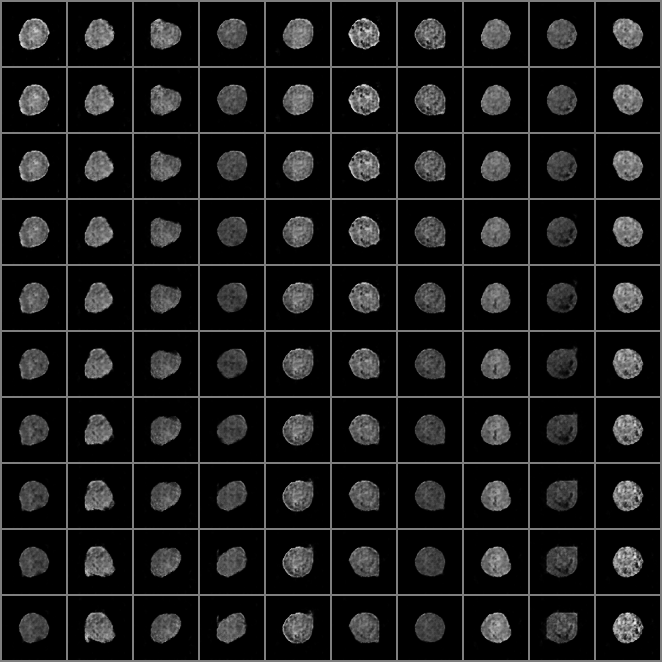

In [8]:
# Display the generated images.

z1 = torch.FloatTensor(10, 100, 1, 1).normal_(0,1)
z2 = torch.FloatTensor(10, 100, 1, 1).normal_(0,1)
dz = (z2 - z1)/10.
z = torch.FloatTensor(100, 100, 1, 1)
for i in range(10):
    z[10*i:10*(i+1),:,:,:] = z1+i*dz

z = Variable(z)
z_out = netG(z)
z_im = convert_img(z_out.data,10)
z_im

## Generate and save few samples

In [4]:
def convert_img(img_tensor, nrow):
    img_tensor = img_tensor.cpu()
    ndarr = img_tensor.mul(0.5).add(0.5).mul(255).byte().numpy()
    ndarr = np.reshape(ndarr,(nrow,1,64,64))
    ndarr = np.transpose(ndarr,(0,2,3,1))
    return ndarr

In [5]:
#print generator network
netG.eval()

DCGAN_G (
  (main): Sequential (
    (initial.100-512.convt): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (initial.512.batchnorm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (initial.512.ReLU): ReLU (inplace)
    (pyramid.512-256.convt): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid.256.batchnorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (pyramid.256.ReLU): ReLU (inplace)
    (pyramid.256-128.convt): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid.128.batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (pyramid.128.ReLU): ReLU (inplace)
    (pyramid.128-64.convt): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid.64.batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (pyramid.64.ReLU): ReLU (inplace)
    (final.64-1.convt): 

In [6]:
#Generate a random noise vector and pass it through the generator.

noise_batch = torch.FloatTensor(100, 100, 1, 1).normal_(0,1)
noise_batch = Variable(noise_batch, volatile=True)
fake_batch = netG(noise_batch)
imarr = convert_img(fake_batch.data, 100)


In [9]:
#Save the generated images
for i in range(imarr.shape[0]):
    c = imarr[i]
    img = c[:,:,0]
    img = Image.fromarray(img)
    img.save(os.path.join('/media/narita/Data/neutrophils-gan/individual-cells',str(i+100)+'.png'))